# Analysis - 3
## - Analysis on Bowlers
#### 1. Highest Wicket Takers
#### 2. Analysis by Economy
#### 3. Reasons for Wickets
#### 4. Analysis on Extras

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
path=os.getcwd()
path

'C:\\PYTHON\\desai_manav_spring2017\\Final'

In [3]:
path=path+'\\Original_Data\\'
path

'C:\\PYTHON\\desai_manav_spring2017\\Final\\Original_Data\\'

In [4]:
df_matches= pd.read_csv(path + "matches.csv")
df_deliveries= pd.read_csv(path + "deliveries.csv")

## 1. Highest Wicket Takers.

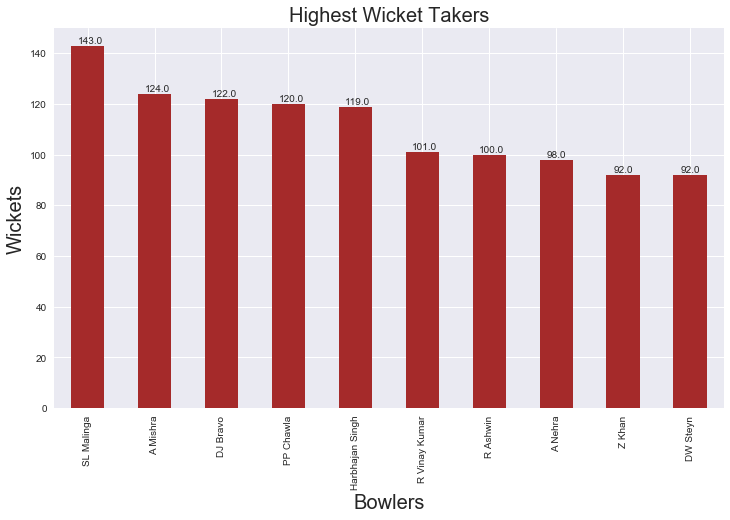

In [5]:
fig, top = plt.subplots(figsize=(12,7))
wicket_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
check=df_deliveries[df_deliveries["dismissal_kind"].isin(wicket_kinds)]
top=check['bowler'].value_counts()[:10].plot.bar(width=0.5,color='Brown')
for each in top.patches:
    top.annotate(format(each.get_height()), (each.get_x()+0.10, each.get_height()+1))
top.set_ylabel("Wickets", size=20)
top.set_xlabel("Bowlers", size=20)
top.set_title("Highest Wicket Takers", size=20)
plt.show()

### Conclusion
##### ~ SL Malinga and DJ Bravo are 2 foreign bowlers with highest Wicket takers
##### ~ A Mishra and PP Chawla are 2 Indian bowlers with highest Wicket takers
##### ~ DW Steyne and Z Khan have taken equal number of wickets

## 2. Analysis by Economy

In [6]:
# Calculating the overs by each bowlers
df_over=df_deliveries.groupby(['bowler']).sum()
df_over['total balls']=df_deliveries['bowler'].value_counts()
df_over['overs']=(df_over['total balls']//6) # because each over has 6 balls
df_over[df_over['overs']>200].sort_values(by='overs',ascending=0)[[14]].head(5).T

bowler,Harbhajan Singh,P Kumar,PP Chawla,A Mishra,SL Malinga
overs,457,421,412,411,401


##### ~ Harbhajan Singh has taken maximum overs
#####  .

In [7]:
#Calculating the economy
df_over['economy']=(df_over['total_runs']/(df_over['overs']))
df_over[(df_over['overs']>300)].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,R Ashwin,SL Malinga,DW Steyn,Harbhajan Singh,A Mishra,PP Ojha,Z Khan,P Kumar,PP Chawla,A Nehra
economy,6.49364,6.5985,6.6156,6.96718,7.20195,7.40432,7.50592,7.57245,7.61165,7.61889


##### ~ R Ashwin has least economy

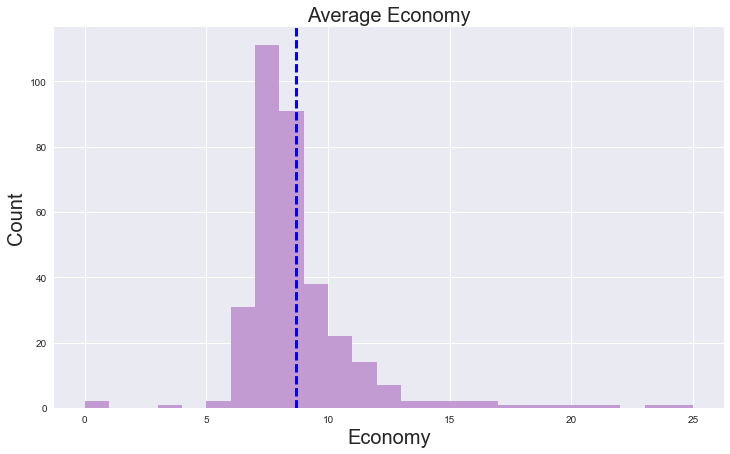

In [8]:
df_over.replace([np.inf, -np.inf], np.nan,inplace=1)
df_over.fillna(0,inplace=1)
bins=range(0,26)
fig, top = plt.subplots(figsize=(12,7))
plt.hist(df_over['economy'],bins,histtype="bar",rwidth=1.2,color='#C39BD3')
plt.xlabel('Economy')
plt.ylabel('Count')
plt.axvline(df_over["economy"].mean(), color='b', linestyle='dashed', linewidth=3)
top.set_ylabel("Count", size=20)
top.set_xlabel("Economy", size=20)
top.set_title("Average Economy", size=20)
plt.plot(figsize=(20,15))
plt.show()

### Conclusion
##### ~ The average economy rate is between 8.5 - 9

## 3. Reasons for Wickets

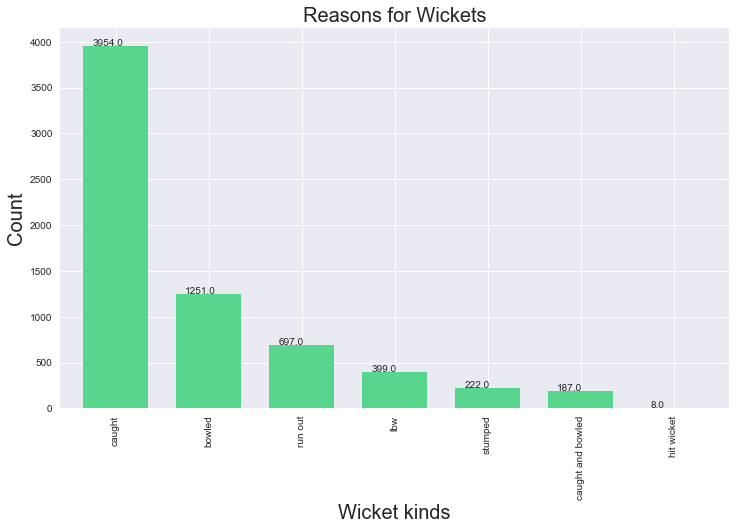

In [9]:
wicket=["run out","bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
check=df_deliveries[df_deliveries["dismissal_kind"].isin(wicket)]
fig, top = plt.subplots(figsize=(12,7))
top=check.dismissal_kind.value_counts()[:10].plot.bar(width=0.7,color='#58D68D')
for each in top.patches:
    top.annotate(format(each.get_height()), (each.get_x()+0.1, each.get_height()+1))
    
top.set_ylabel("Count", size=20)
top.set_xlabel("Wicket kinds", size=20)
top.set_title("Reasons for Wickets", size=20)
plt.plot()
plt.show()

### Conclusion
##### ~ Maximum wickets occur because of 'Catches'
##### ~ Minimum wickets occur because of 'Hit wickets'

## 4. Analysis on Extras

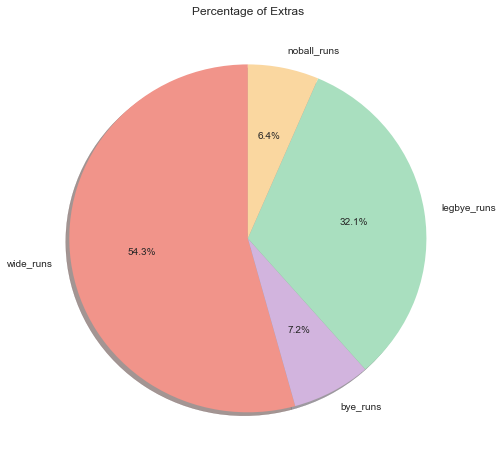

In [10]:
extras=df_deliveries[['wide_runs','bye_runs','legbye_runs','noball_runs']].sum()
sizes=[5161,680,3056,612]
plt.pie(sizes, labels=['wide_runs','bye_runs','legbye_runs','noball_runs'],
        colors=['#F1948A', '#D2B4DE', '#A9DFBF', '#FAD7A0'],explode=(0,0,0,0),autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage of Extras")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.plot()
plt.show()

### Conclusion
##### ~ Wide Runs is biggest reason for EXTRAS given
##### ~ No Ball Runs is least reason for EXTRAS given